In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
import statistics as st
import re
import numpy as np

In [4]:
path_0 = "/Users/mariam/Desktop/LCP2/project/F_data/" #change path according to machine 
dirs_0 = os.listdir(path_0)


In [8]:
dirs_01 = list()
files = list()
paths_1 = list()
for i,f in enumerate(dirs_0):
    if dirs_0[i].startswith('F'):
        paths_1.append(path_0+dirs_0[i])
    
    
for j,d in enumerate(paths_1):   
    if os.path.isdir(paths_1[j]):
        dirs_01 = os.listdir(paths_1[j])
        for dirs01 in dirs_01: 
            if dirs01.endswith(".csv"):
                files.append(dirs01)
    

In [9]:
#get metalicities and alphas 
metalicities = list()
alphas = list()
for f in files:
    part0 = f.partition('FZ')
    part1 = part0[2].partition('A')
    part2=part1[2].partition(".csv")
    m = float(part1[0])
    metalicities.append(m)
    a = float(part2[0])
    alphas.append(a)

print(metalicities)
print(len(metalicities))
print(alphas)
print(len(alphas))

[0.02, 0.01, 0.016, 0.014, 0.016, 0.014, 0.02, 0.01, 0.016, 0.02, 0.014, 0.01]
12
[3.0, 3.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 3.0, 0.5, 3.0, 0.5]
12


In [10]:
dfs = []
#create a list of dataframes from all the folders 
for i in range(0,len(paths_1)):
    df = pd.read_csv(paths_1[i]+'/'+files[i])
    dfs.append(df)
dfs_1= pd.concat(dfs)
dfs_1

,Unnamed: 0,Unnamed: 0.1,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,RHE_0,RCO_0,...,Phase_1,RemnantType_1,Zams_1,Semimajor,Period,Eccentricity,RL0,RL1,BWorldtime,BEvent
0,0,0,849,0_815279414599931,1.652409,0.0,0.0,0.000016,0.0,0.0,...,1,0,23.068610,2.890370,0.000320,4.362786e-08,0.549577,1.734941,6.283394,-1
1,1,1,849,0_815279414599931,1.652409,0.0,0.0,0.000016,0.0,0.0,...,1,0,23.068610,2.743030,0.000297,3.277706e-08,0.522054,1.645841,6.283450,-1
2,2,2,849,0_815279414599931,1.652409,0.0,0.0,0.000016,0.0,0.0,...,1,0,23.068610,2.603244,0.000275,2.464692e-08,0.495914,1.561348,6.283502,-1
3,3,3,849,0_815279414599931,1.652409,0.0,0.0,0.000016,0.0,0.0,...,1,0,23.068610,2.470597,0.000254,1.854806e-08,0.471082,1.481205,6.283550,-1
4,4,4,849,0_815279414599931,1.652409,0.0,0.0,0.000016,0.0,0.0,...,1,0,22.793440,2.344719,0.000235,1.396885e-08,0.447491,1.405186,6.283594,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347127,347127,14775,3999578,0_139058318622113,1.714951,0.0,0.0,0.000016,0.0,0.0,...,4,0,8.620891,1.698933,0.000218,0.000000e+00,0.427149,0.885405,9.675157,-1
347128,347128,14776,3999578,0_139058318622113,1.714988,0.0,0.0,0.000016,0.0,0.0,...,4,0,8.620891,1.772516,0.000233,0.000000e+00,0.445741,0.923640,9.677097,-1
347129,347129,14777,3999578,0_139058318622113,1.715033,0.0,0.0,0.000016,0.0,0.0,...,4,0,8.620891,1.843651,0.000247,0.000000e+00,0.463744,0.960566,9.679433,-1
347130,347130,14778,3999578,0_139058318622113,1.715090,0.0,0.0,0.000016,0.0,0.0,...,4,0,8.620891,1.916002,0.000262,0.000000e+00,0.482099,0.998069,9.682460,-1


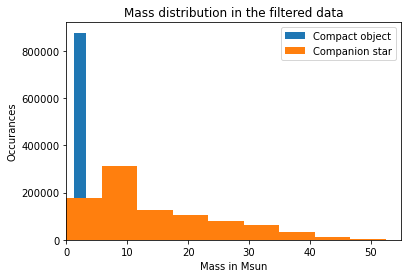

In [12]:
plt.hist(dfs_1['Mass_0'],label = 'Compact object')
plt.hist(dfs_1['Mass_1'],label = 'Companion star')
plt.xlabel("Mass in Msun")
plt.ylabel("Occurances")
plt.xlim(0,55)
plt.title("Mass distribution in the filtered data")
plt.legend(loc='upper right')

In [13]:
m0_means = list()
m1_means = list()
m0_modes = list()
m1_modes = list()
for d in dfs:
    mean0 = st.mean(d['Mass_0'])
    m0_means.append(mean0)
    mean1 = st.mean(d['Mass_1'])
    m1_means.append(mean1)
    mode0 = st.mode(d['Mass_0'])
    m0_modes.append(mode0)
    mode1 = st.mode(d['Mass_1'])
    m1_modes.append(mode1)


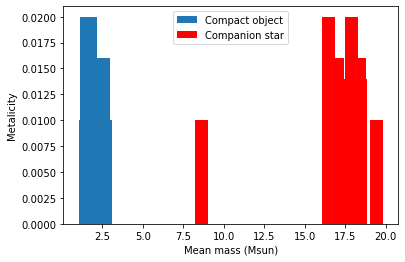

In [14]:
plt.bar(m0_means,metalicities,label = "Compact object")
plt.bar(m1_means,metalicities,label = "Companion star",color = 'red')
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Metalicity")
plt.legend(loc = "best")

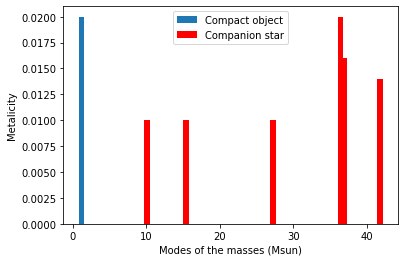

In [15]:
plt.bar(m0_modes, metalicities, label= 'Compact object')
plt.bar(m1_modes,metalicities,label = "Companion star",color = 'red')
plt.xlabel("Modes of the masses (Msun)")
plt.ylabel("Metalicity")
plt.legend(loc = "best")

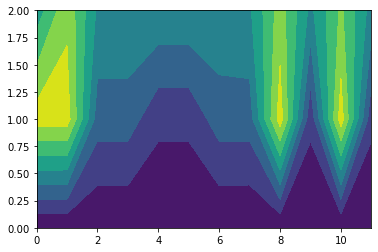

In [16]:
plt.contourf((metalicities, alphas, m0_means))

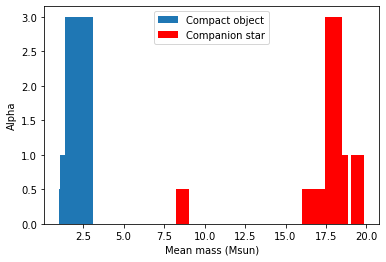

In [17]:
plt.bar(m0_means,alphas,label = "Compact object")
plt.bar(m1_means,alphas,label = "Companion star",color = 'red')
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Alpha")
plt.legend(loc = "best")

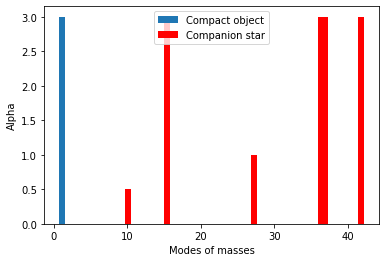

In [18]:
plt.bar(m0_modes,alphas,label = "Compact object")
plt.bar(m1_modes,alphas,label = "Companion star",color = 'red')
plt.xlabel("Modes of masses")
plt.ylabel("Alpha")
plt.legend(loc = "best")

In [19]:
phases = pd.DataFrame()
for d in dfs:
    phases = phases.append(d['Phase_1'])

phases = phases.fillna(55) #the lengths of the files differ that's why we get NaN, replace Nan with 55(random big number)
phases = phases.T
phases

,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1,Phase_1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
347127,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,4.0
347128,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,4.0
347129,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,4.0
347130,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,4.0


In [32]:
mean_phase = st.mean(dfs_1['Phase_1'])
var_phase = st.variance(dfs_1['Phase_1'])
print("The mean of the phases is:",mean_phase)
print("The variance of the phases is:", var_phase)

The mean of the phases is: 2.426578510146016
The variance of the phases is: 3.3942847312212874


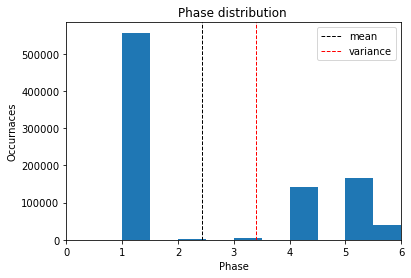

In [36]:
plt.hist(dfs_1['Phase_1'])
plt.xlim(0,6) 
plt.ylabel("Occurnaces")
plt.title("Phase distribution ")
plt.axvline(mean_phase, color='k', linestyle='dashed', linewidth=1,label = 'mean')
plt.axvline(var_phase,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
plt.legend(loc= 'best')
plt.show()

In [37]:
mean_semimaj = st.mean(dfs_1['Semimajor'])
var_semimaj = st.variance(dfs_1['Semimajor'])
print("The mean of the semimajor axes is:",mean_semimaj)
print("The variance of the semimajor axes is:", var_semimaj)



The mean of the semimajor axes is: 1.8058532585473281
The variance of the semimajor axes is: 0.3115194457738683


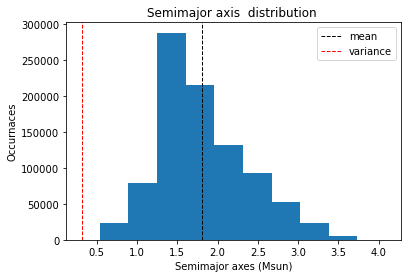

In [47]:
plt.hist(dfs_1['Semimajor'])
plt.xlabel("Semimajor axes (Msun)")
plt.ylabel("Occurnaces")
plt.title("Semimajor axis  distribution ")
plt.axvline(mean_semimaj, color='k', linestyle='dashed', linewidth=1,label = 'mean')
plt.axvline(var_semimaj,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
plt.legend(loc= 'best')
plt.show()

In [39]:
mean_ecc = st.mean(dfs_1['Eccentricity'])
var_ecc = st.variance(dfs_1['Eccentricity'])
print("The mean of the eccentricities is:",mean_ecc)
print("The variance of the eccentricities is:", var_ecc)

The mean of the eccentricities is: 0.004512531996252632
The variance of the eccentricities is: 0.00121495649084781


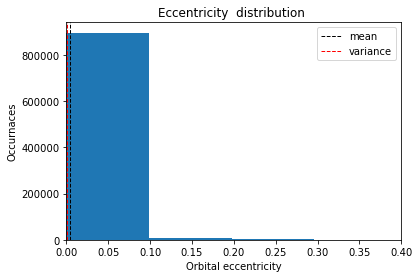

In [48]:
plt.hist(dfs_1['Eccentricity'])
plt.xlabel("Orbital eccentricity")
plt.ylabel("Occurnaces")
plt.xlim(0,0.4)
plt.title("Eccentricity  distribution ")
plt.axvline(mean_ecc, color='k', linestyle='dashed', linewidth=1,label = 'mean')
plt.axvline(var_ecc,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
plt.legend(loc= 'best')
plt.show()